Iteracja: 0, Maksymalna zmiana: 2.00e-01
Iteracja: 500, Maksymalna zmiana: 2.85e-04
Iteracja: 1000, Maksymalna zmiana: 1.21e-04
Iteracja: 1500, Maksymalna zmiana: 5.91e-05
Iteracja: 2000, Maksymalna zmiana: 3.12e-05
Iteracja: 2500, Maksymalna zmiana: 1.79e-05
Iteracja: 3000, Maksymalna zmiana: 1.11e-05
Iteracja: 3500, Maksymalna zmiana: 7.36e-06
Iteracja: 4000, Maksymalna zmiana: 5.15e-06
Iteracja: 4500, Maksymalna zmiana: 3.73e-06
Iteracja: 5000, Maksymalna zmiana: 2.76e-06
Iteracja: 5500, Maksymalna zmiana: 2.07e-06
Iteracja: 6000, Maksymalna zmiana: 1.57e-06
Iteracja: 6500, Maksymalna zmiana: 1.19e-06
Iteracja: 7000, Maksymalna zmiana: 9.15e-07
Iteracja: 7500, Maksymalna zmiana: 7.04e-07
Iteracja: 8000, Maksymalna zmiana: 5.43e-07
Iteracja: 8500, Maksymalna zmiana: 4.20e-07
Iteracja: 9000, Maksymalna zmiana: 3.25e-07
Iteracja: 9500, Maksymalna zmiana: 2.52e-07
Iteracja: 10000, Maksymalna zmiana: 1.96e-07
Iteracja: 10500, Maksymalna zmiana: 1.52e-07
Iteracja: 11000, Maksymalna zmiana

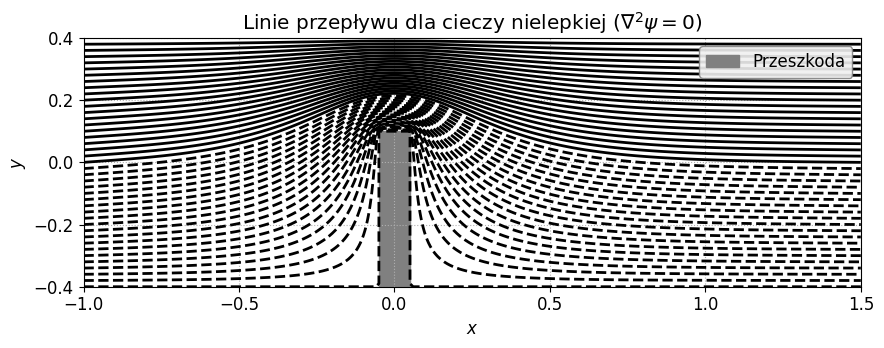

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
nx, ny = 251, 81
a, b = 100, 40
dz = 0.01
A = 1.0
IK, JK = 5, 10
y1, y2 = -40 * dz, 40 * dz
max_iter, eps = 30000, 1e-7
I_MIN_OBS, I_MAX_OBS, J_MAX_OBS = -IK + a, IK + a, JK + b

# Inicjalizacja
psi = np.zeros((nx, ny))
y_vals = (np.arange(ny) - b) * dz
psi[0, :], psi[nx-1, :] = A * y_vals, A * y_vals
psi[:, ny-1], psi[:, 0] = A * y2, A * y1
psi[I_MIN_OBS:I_MAX_OBS+1, :J_MAX_OBS+1] = A * y1

# Maska logiczna
is_fluid = np.full((nx, ny), True, dtype=bool)
is_fluid[I_MIN_OBS:I_MAX_OBS+1, :J_MAX_OBS+1] = False
is_fluid_interior = is_fluid[1:-1, 1:-1]

# Główna pętla
for iteration in range(max_iter):
    psi_prev = psi.copy()

    # Wektorowa aktualizacja dla równania Laplace'a
    update = 0.25 * (psi[2:, 1:-1] + psi[:-2, 1:-1] + psi[1:-1, 2:] + psi[1:-1, :-2])
    
    # Zastosowanie maski
    psi[1:-1, 1:-1][is_fluid_interior] = update[is_fluid_interior]

    if iteration % 500 == 0:
        delta = np.max(np.abs(psi - psi_prev))
        print(f"Iteracja: {iteration}, Maksymalna zmiana: {delta:.2e}")
        if delta < eps:
            print(f"\nOsiągnięto zbieżność w iteracji {iteration}.")
            break
else:
    print("\nOsiągnięto maksymalną liczbę iteracji.")

# --- Rysowanie wykresu ---


plt.rcParams.update({
    'lines.linewidth': 2,
    'font.size': 12,
    'legend.framealpha': 0.9,
    'legend.facecolor': '#f0f0f0',
    'legend.edgecolor': 'gray'
})
# --- Rysowanie wykresu ---
plt.figure(figsize=(9, 7))

x_coords = (np.arange(nx) - a) * dz
y_coords = (np.arange(ny) - b) * dz

# Linie strumienia
plt.contour(x_coords, y_coords, psi.T, levels=40, colors='k', linewidths=2)

# Przeszkoda
plt.fill_between(x_coords[I_MIN_OBS:I_MAX_OBS+1], y1, y_coords[J_MAX_OBS], color='gray', label='Przeszkoda')

# Opisy i wygląd
plt.title('Linie przepływu dla cieczy nielepkiej ($\\nabla^2\\psi = 0$)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle=':', linewidth=0.8)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
